[Reference](https://towardsdatascience.com/dbscan-explained-in-5-minutes-133f6a9766e4)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN as DB
import time
import warnings

warnings.filterwarnings('ignore')

In [2]:
def distances(object, data):
  euclidean = []
  for row in data: #iterating through all the objects in the dataset
    d = 0
    for i in range(data.shape[1]): #calculating sum of squared residuals for all the coords
      d+=(row[i]-object[i])**2
    euclidean.append(d**0.5) #taking a sqaure root
  return np.array(euclidean)

In [3]:
def DBSCAN(data, epsilon=0.5, N=3):
  visited, noise = [], [] #lists to collect visited points and outliers
  clusters = [] #list to collect clusters
  for i in range(data.shape[0]): #iterating through all the points
    if i not in visited: #getting in if the point's not visited
      visited.append(i)
      d = distances(data[i], data) #getting distances to all the other points
      neighbors = list(np.where((d<=epsilon)&(d!=0))[0]) #getting the list of neighbors in the epsilon vicinity and removing distance = 0 (it's the point itself)
      if len(neighbors)<N: #if the number of object is less than N, it's an outlier
        noise.append(i)
      else:
        cluster = [i] #otherwise it forms a new cluster
        for neighbor in neighbors: #iterating trough all the neighbors of the point i
          if neighbor not in visited: #if neighbor isn't visited
            visited.append(neighbor)
            d = distances(data[neighbor], data) #get the distances to other objects from the neighbor
            neighbors_idx = list(np.where((d<=epsilon)&(d!=0))[0]) #getting neighbors of the neighbor
            if len(neighbors_idx)>=N: #if the neighbor has N or more neighbors, than it's a core point
              neighbors += neighbors_idx #add neighbors of the neighbor to the neighbors of the ith object
          if not any(neighbor in cluster for cluster in clusters):
            cluster.append(neighbor) #if neighbor is not in clusters, add it there
        clusters.append(cluster) #put the cluster into clusters list

  return clusters, noise

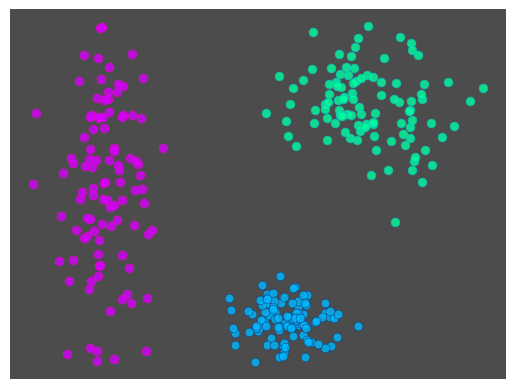

In [4]:
X1 = [[x,y] for x, y in zip(np.random.normal(6,1, 100), np.random.normal(0,0.5, 100))]
X2 = [[x,y] for x, y in zip(np.random.normal(10,2, 100), np.random.normal(6,1, 100))]
X3 = [[x,y] for x, y in zip(np.random.normal(-2,1, 100), np.random.normal(4,2.5, 100))]

fig, ax = plt.subplots()
ax.scatter([x[0] for x in X1], [y[1] for y in X1], s=40, c='#00b8ff', edgecolors='#133e7c', linewidth=0.5, alpha=0.8)
ax.scatter([x[0] for x in X2], [y[1] for y in X2], s=40, c='#00ff9f', edgecolors='#0abdc6', linewidth=0.5, alpha=0.8)
ax.scatter([x[0] for x in X3], [y[1] for y in X3], s=40, c='#d600ff', edgecolors='#ea00d9', linewidth=0.5, alpha=0.8)
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('black')
ax.patch.set_alpha(0.7)

In [5]:
data = np.array(X1+X2+X3)
clusters, outliers = DBSCAN(data, epsilon=1.5, N=5)

In [6]:
def label(df, clusters, outliers):
  labels = [f'Cluster_{i}' for i in range(len(clusters))]
  for i, cluster in enumerate(clusters):
    for j in cluster:
      df.loc[j, 'cluster'] = labels[i]

  for i in outliers:
    df.loc[i, 'cluster'] = 'Outlier'
  return df

In [7]:
df = pd.DataFrame(data, columns=['X', 'Y'])
df = label(df, clusters, outliers)
df

,X,Y,cluster
0,7.801776,0.203519,Cluster_0
1,6.488399,0.934661,Cluster_0
2,5.965786,-0.722258,Cluster_0
3,6.312456,-0.189769,Cluster_0
4,5.237625,0.748254,Cluster_0
...,...,...,...
295,-2.381887,3.539429,Cluster_2
296,-2.522645,5.744327,Cluster_2
297,-3.262331,1.695898,Cluster_2
298,-2.784336,2.320859,Cluster_2


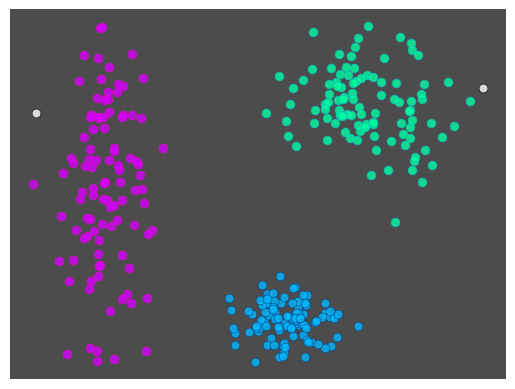

In [8]:
fig, ax = plt.subplots()
ax.scatter(df.X[df.cluster=='Cluster_0'], df.Y[df.cluster=='Cluster_0'], s=40, c='#00b8ff', edgecolors='#133e7c', linewidth=0.5, alpha=0.8)
ax.scatter(df.X[df.cluster=='Cluster_1'], df.Y[df.cluster=='Cluster_1'], s=40, c='#00ff9f', edgecolors='#0abdc6', linewidth=0.5, alpha=0.8)
ax.scatter(df.X[df.cluster=='Cluster_2'], df.Y[df.cluster=='Cluster_2'], s=40, c='#d600ff', edgecolors='#ea00d9', linewidth=0.5, alpha=0.8)
ax.scatter(df.X[df.cluster=='Outlier'], df.Y[df.cluster=='Outlier'], s=40, c='white', edgecolors='black', linewidth=0.5, alpha=0.8)
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('black')
ax.patch.set_alpha(0.7)

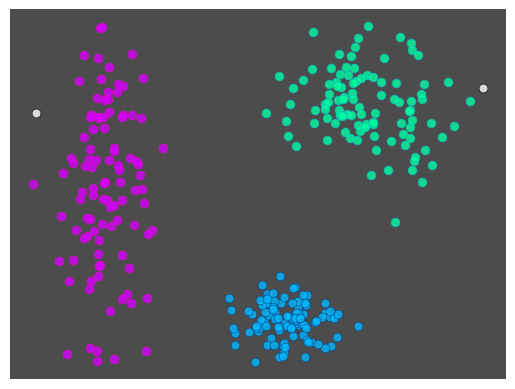

In [14]:
clustering = DB(eps=1.5, min_samples=5).fit(data)

df2 = pd.DataFrame(data, columns=['X', 'Y'])
df2['cluster'] = clustering.labels_
fig, ax = plt.subplots()
ax.scatter(df2.X[df2.cluster==0], df2.Y[df2.cluster==0], s=40, c='#00b8ff', edgecolors='#133e7c', linewidth=0.5, alpha=0.8)
ax.scatter(df2.X[df2.cluster==1], df2.Y[df2.cluster==1], s=40, c='#00ff9f', edgecolors='#0abdc6', linewidth=0.5, alpha=0.8)
ax.scatter(df2.X[df2.cluster==2], df2.Y[df2.cluster==2], s=40, c='#d600ff', edgecolors='#ea00d9', linewidth=0.5, alpha=0.8)
ax.scatter(df2.X[df2.cluster==-1], df.Y[df2.cluster==-1], s=40, c='white', edgecolors='black', linewidth=0.5, alpha=0.8)
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('black')
ax.patch.set_alpha(0.7)